# **[Data4life] Trending YouTube Analysis**

## **Import packages**

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## **Load datasets**

In [2]:
us_videos = pd.read_csv(filepath_or_buffer='./youtube_data/USvideos.csv', encoding='ISO-8859-1')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
with open(file='./youtube_data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

## **Clean data**

In [4]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,949.00","40,949.00","40,949.00","40,949.00","40,949.00"
mean,19.97,"2,360,784.64","74,266.70","3,711.40","8,446.80"
std,7.57,"7,394,113.76","228,885.34","29,029.71","37,430.49"
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,"242,329.00","5,424.00",202.00,614.00
50%,24.00,"681,861.00","18,091.00",631.00,"1,856.00"
75%,25.00,"1,823,157.00","55,417.00","1,938.00","5,755.00"
max,43.00,"225,211,923.00","5,613,827.00","1,674,420.00","1,361,580.00"


In [6]:
us_videos.duplicated().sum()

np.int64(48)

In [33]:
us_videos.drop_duplicates(inplace=True, ignore_index=True)

In [34]:
us_videos.duplicated().sum()

np.int64(0)

In [35]:
us_videos['trending_date'] = pd.to_datetime(arg=us_videos['trending_date'], format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(arg=us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,likes/dislikes
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,19.39
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,15.81
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,27.35
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,15.25
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,66.45


In [36]:
us_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category                          object
likes/dislikes                   float64
dtype: object

In [37]:
us_videos['category'] = us_videos['category_id'].map(categories).str[0]
us_videos['category'].head()

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

## **General**

### **Question 1: What is the number of trending videos for each year?**

In [38]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,2119
1,2018,4427


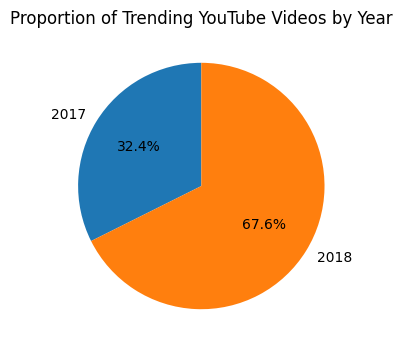

In [50]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().plot.pie(
    y='video_id', startangle=90, autopct='%1.1f%%', figsize=(5, 4)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

The number of trending videos in 2017 was significantly less than in 2018. Now, let's check the start and last dates in this dataset.

In [40]:
us_videos['trending_date'].min(), us_videos['trending_date'].max()

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In 2017, there are just 2 months (November to December), while in 2018, there are 6 months (January to June). Thus, the difference in quantity is normal.

### **Question 2: How many videos have disabled comments?**

In [41]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique()

comments_disabled
False    6251
True      107
Name: video_id, dtype: int64

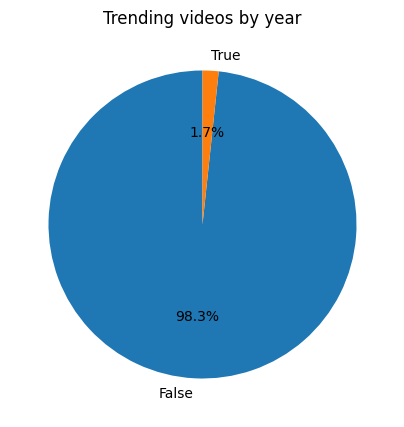

In [42]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique().plot.pie(
    y='comments_disabled', startangle=90, autopct='%1.1f%%', figsize=(5, 5)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

### **Question 3: How many videos have disabled ratings?**

### **Question 4: How many videos have errors or have been removed?**

## **Videos**

### **Question 5: Which videos reach the YouTube Trending Board the quickest? Which channels do those videos belong to?**

### **Question 6: Which videos remain on the YouTube Trending Board the longest? Which channels do those videos belong to?**

In [15]:
trending_duration = us_videos['video_id'].value_counts()
trending_duration = trending_duration[trending_duration == trending_duration.max()].reset_index()
trending_duration = trending_duration.merge(right=us_videos[['video_id', 'title']].drop_duplicates(), on='video_id')
trending_duration = trending_duration.reindex(columns=['video_id', 'title', 'count'])
trending_duration

,video_id,title,count
0,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30


## **Channels**

### **Question 7: What is the number of channels?**

### **Question 8: Which channels feature the highest number of trending videos?**

In [16]:
us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False).head(n=10)

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
The Late Show with Stephen Colbert        58
Netflix                                   58
NBA                                       55
CNN                                       52
Vox                                       47
The Late Late Show with James Corden      46
Name: video_id, dtype: int64

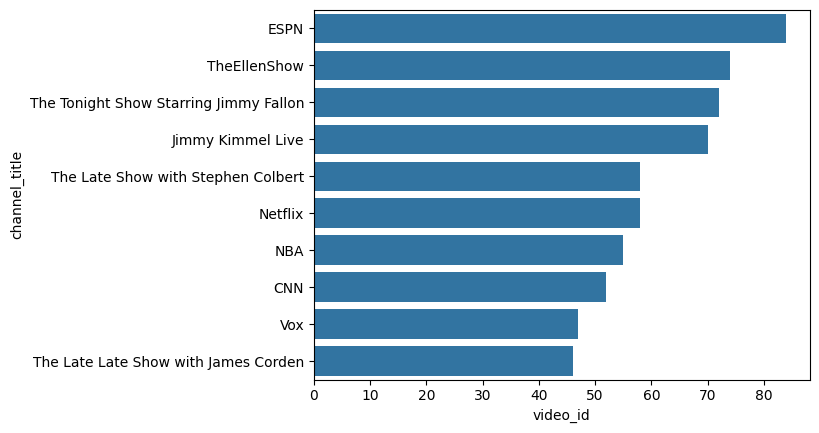

In [17]:
sns.barplot(data=us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False).head(n=10),
            orient='h')
plt.show()

### **Question 9: Which channels have the highest number of published categories?**

### **Question 10: Which channels receive the most average views, likes, dislikes, and comments?**

### **Question 11: Which channels have the best average ratio of likes to dislikes?**

## **Seasonality**

### **Question 12: Which months or quarters see the highest number of published videos?**

### **Question 13: Which months or quarters see the highest number of trending videos?**

In [18]:
us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique()

publish_time
1     1269
2      995
3      688
4      537
5      541
6      147
7        4
8        6
9       10
10      17
11     972
12    1167
Name: video_id, dtype: int64

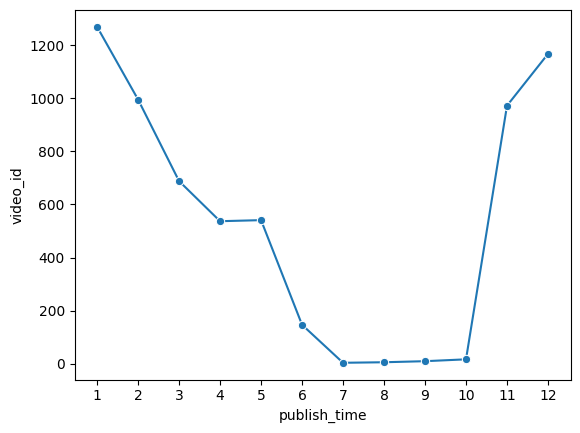

In [19]:
sns.lineplot(data=us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique(), marker='o')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [20]:
us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique()

publish_time
1    2952
2    1224
3      20
4    2156
Name: video_id, dtype: int64

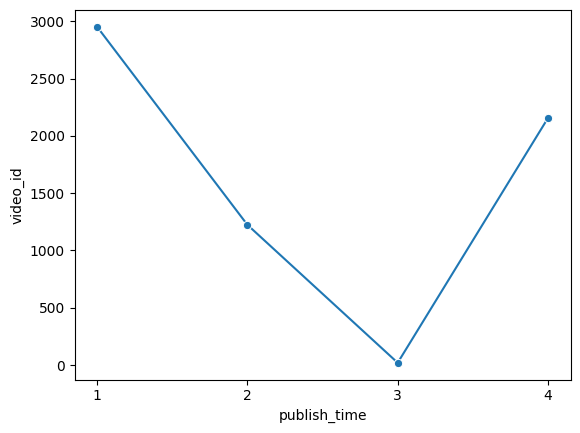

In [21]:
sns.lineplot(data=us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique(), marker='o')
plt.xticks(ticks=range(1, 5), labels=range(1, 5))
plt.show()

## **Title**

### **Question 14: How many videos have titles that are capitalized or non-capitalized?**

In [22]:
upper_titles = us_videos[us_videos['title'] == us_videos['title'].str.upper()]
lower_titles = us_videos[us_videos['title'] == us_videos['title'].str.lower()]
us_videos[~(us_videos.index.isin(upper_titles.index) | us_videos.index.isin(lower_titles.index))]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,iJustine,28,2017-11-13 19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,Science & Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


### **Question 15: What is the length of videos' title?**

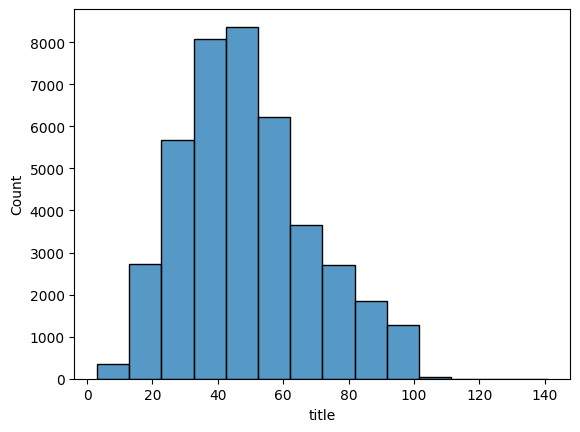

In [23]:
sns.histplot(data=us_videos['title'].str.len(), binwidth=10)
plt.show()

### **Question 16: How many videos share the same title?**

## **Categories**

### **Question 17: What categories are the most common?**

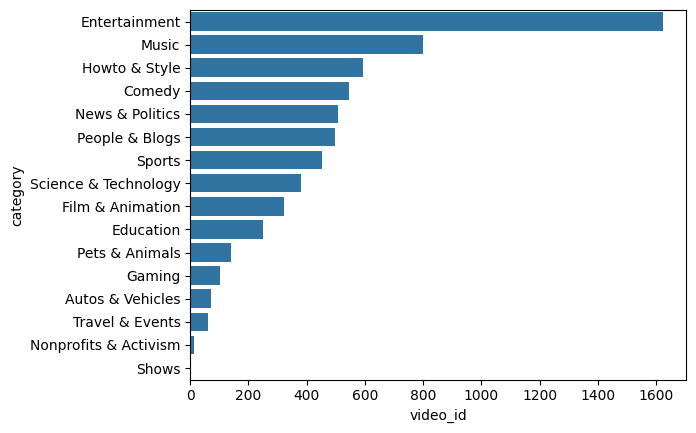

In [24]:
sns.barplot(data=us_videos.groupby(by='category')['video_id'].nunique().sort_values(ascending=False), orient='h')
plt.show()

### **Question 18: What categories receive the most average views, likes, dislikes, and comments?**

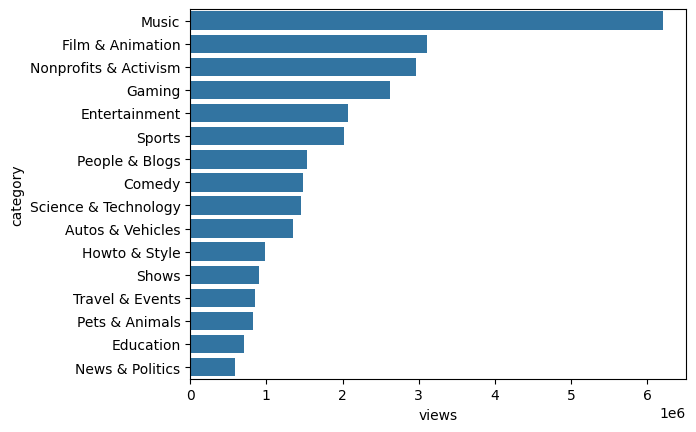

In [25]:
sns.barplot(data=us_videos.groupby(by='category')['views'].mean().sort_values(ascending=False), orient='h')
plt.show()

In [26]:
videos_by_category = us_videos.groupby(by='category', as_index=False).agg({'video_id': 'nunique', 'views': 'mean'}).sort_values(by='video_id', ascending=False)
videos_by_category

,category,video_id,views
3,Entertainment,1622,"2,067,883.20"
7,Music,801,"6,201,003.12"
6,Howto & Style,595,"983,730.12"
1,Comedy,547,"1,480,308.42"
8,News & Politics,507,"592,587.74"
10,People & Blogs,498,"1,531,835.43"
14,Sports,452,"2,025,969.03"
12,Science & Technology,381,"1,452,626.75"
4,Film & Animation,321,"3,106,250.20"
2,Education,251,"712,940.82"


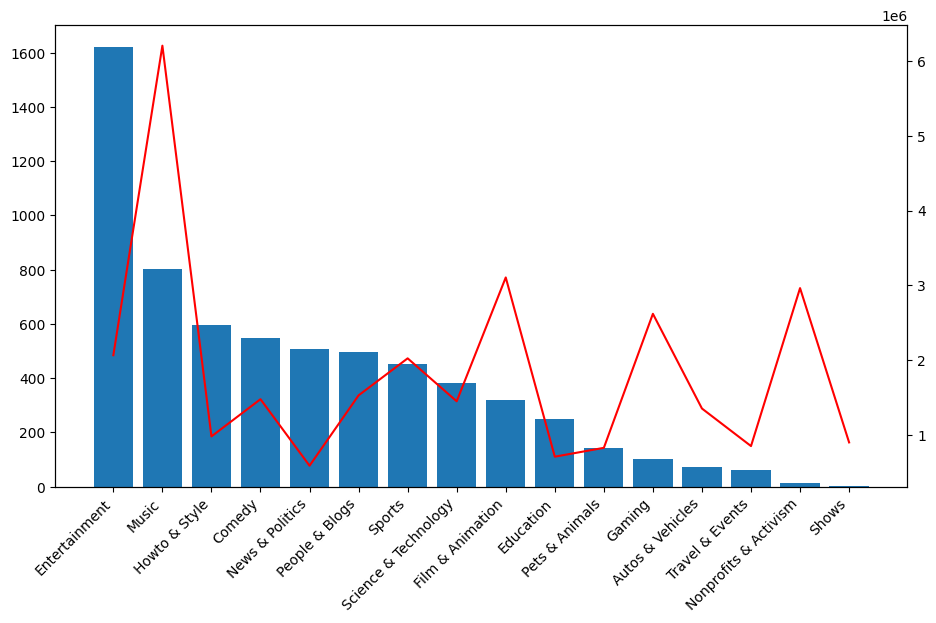

In [27]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))
ax2 = ax1.twinx()

ax1.bar(x='category', height='video_id', data=videos_by_category)
ax2.plot('category', 'views', data=videos_by_category, color='red')

ax1.set_xticks(ticks=videos_by_category['category'], labels=videos_by_category['category'], rotation=45, ha='right')
plt.show()

## **Tags**

### **Question 19: What tags are the most common?**

### **Question 20: What tags receive the most average views, likes, dislikes, and comments?**

## **Key factors for popularity**

### **Question 21: Which are the key factors that contribute to popularity?**